<a href="https://colab.research.google.com/github/diogocastro80/Data-Challenge-20221121/blob/main/Challenge_coodesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


#lendo os arquivos
netflix = pd.read_csv('netflix_titles.csv')
prime = pd.read_csv('amazon_prime_titles.csv')

#adicionando um identificador no ID p/ rastrear a origem do dado
netflix['show_id'] = netflix['show_id'].str.replace('s', 'n')
prime['show_id'] = prime['show_id'].str.replace('s', 'p')


In [ ]:
#unindo as duas bases
total_movies = pd.concat((netflix, prime), axis = 0)

#remover titulos duplicados (Titulos com mesmo nome e duração e titulos com mesmo nome e mesmo diretor)
total_movies = total_movies.drop_duplicates(subset=['type', 'title', 'duration'])
total_movies = total_movies.drop_duplicates(subset=['type', 'title', 'director'])
display(total_movies)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,n1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,n2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,n3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,n4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,n5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,p9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,p9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,p9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,p9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [ ]:
#filtando categoria Movies
total_movies_f = total_movies[total_movies['type'] == 'Movie']


#split atores
atores = total_movies_f['cast'].str.split(',')
atores = atores.explode()
atores = atores.str.strip()

atores_df = atores.to_frame(name='ator/atriz')
atores_df = atores_df.fillna('s/ dados ator')
atores_df = atores_df[atores_df['ator/atriz'] != ''] #remover espaços vazios gerados devido a ", ," no comando split 

#contagem de produções por ator/atriz
contagem_ator = atores_df['ator/atriz'].value_counts().to_dict()

atores_df['#filmes'] = atores_df['ator/atriz'].map(contagem_ator)
atores_df = atores_df.drop_duplicates()
atores_df = atores_df.sort_values('#filmes', ascending=False)
atores_df['rank'] = atores_df['#filmes'].rank(ascending=False).astype(int) - 1


display(atores_df.head(11).style.hide_index())


<ipython-input-4-6190f95fa395>:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(atores_df.head(11).style.hide_index())


ator/atriz,#filmes,rank
s/ dados ator,1239,0
Anupam Kher,56,1
Maggie Binkley,55,2
Amitabh Bachchan,44,3
Nassar,43,4
Akshay Kumar,40,5
Shah Rukh Khan,40,5
Paresh Rawal,39,7
Naseeruddin Shah,37,8
Danny Trejo,36,9


In [ ]:
#top 5 paises considerando todos os dados
#split paises
paises = total_movies_f['country'].str.split(',')
paises = paises.explode()
paises = paises.str.strip()

paises_df = paises.to_frame(name='pais')
paises_df = paises_df.fillna('s/ dados pais')
paises_df = paises_df[paises_df['pais'] != ''] # remover espaços vazios gerados devido a ", ," no comando split


#contagem de produções por país
contagem_pais = paises_df['pais'].value_counts().to_dict()

paises_df['#filmes'] = paises_df['pais'].map(contagem_pais)
paises_df = paises_df.drop_duplicates()
paises_df = paises_df.sort_values('#filmes', ascending=False)
paises_df['rank'] = paises_df['#filmes'].rank(ascending=False).astype(int) - 1

display(paises_df.head(6).style.hide_index())


<ipython-input-5-9186a5aa9a69>:24: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(paises_df.head(6).style.hide_index())


pais,#filmes,rank
s/ dados pais,7536,0
United States,3002,1
India,1184,2
United Kingdom,589,3
Canada,348,4
France,320,5


In [ ]:
#top 5 paises comparando netflix vs prime
#top 5 netflix
#split paises
net_filtro = netflix[netflix['type'] == 'Movie']
paises_net = net_filtro['country'].str.split(',')
paises_net = paises_net.explode()
paises_net = paises_net.str.strip()

paises_net = paises_net.to_frame(name='pais')
paises_net = paises_net.fillna('s/ dados pais')
paises_net = paises_net[paises_net['pais'] != ''] # remover espaços vazios gerados devido a ", ," no comando split
paises_net = paises_net[paises_net['pais'] != 's/ dados pais']


#contagem de produções por país
contagem_pais = paises_net['pais'].value_counts().to_dict()

paises_net['#filmes'] = paises_net['pais'].map(contagem_pais)
paises_net = paises_net.drop_duplicates()
paises_net = paises_net.sort_values('#filmes', ascending=False)
paises_net['rank'] = paises_net['#filmes'].rank(ascending=False).astype(int)


#top 5 prime
#split paises
paises_pri_filtro = prime[prime['type'] == 'Movie']
paises_pri = paises_pri_filtro['country'].str.split(',')
paises_pri = paises_pri.explode()
paises_pri = paises_pri.str.strip()

paises_pri = paises_pri.to_frame(name='pais')
paises_pri = paises_pri.fillna('s/ dados pais')
paises_pri = paises_pri[paises_pri['pais'] != ''] # remover espaços vazios gerados devido a ", ," no comando split
paises_pri = paises_pri[paises_pri['pais'] != 's/ dados pais']



#contagem de produções por país
contagem_pais = paises_pri['pais'].value_counts().to_dict()

paises_pri['#filmes'] = paises_pri['pais'].map(contagem_pais)
paises_pri = paises_pri.drop_duplicates()
paises_pri = paises_pri.sort_values('#filmes', ascending=False)
paises_pri['rank'] = paises_pri['#filmes'].rank(ascending=False).astype(int)


#adicionando plataforma e unindo as duas bases
paises_net['plataforma'] = 'Netflix'
paises_pri['plataforma'] = 'Prime'
paises_all = paises_net.head(5).append(paises_pri.head(5))

display(paises_all.style.hide_index())


<ipython-input-29-7bbddf08f64f>:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paises_all = paises_net.head(5).append(paises_pri.head(5))
<ipython-input-29-7bbddf08f64f>:64: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(paises_all.style.hide_index())


pais,#filmes,rank,plataforma
United States,2752,1,Netflix
India,962,2,Netflix
United Kingdom,534,3,Netflix
Canada,319,4,Netflix
France,303,5,Netflix
United States,267,1,Prime
India,230,2,Prime
United Kingdom,58,3,Prime
Canada,31,4,Prime
France,19,5,Prime


<ipython-input-7-5249b5822fb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_filtro['date_added'] = pd.to_datetime(net_filtro['date_added'])
<ipython-input-7-5249b5822fb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_filtro['mes_add'] = net_filtro['date_added'].dt.month
<ipython-input-7-5249b5822fb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

mes_add,#adicoes
1,546
2,382
3,529
4,550
5,439
6,492
7,565
8,519
9,519
10,545


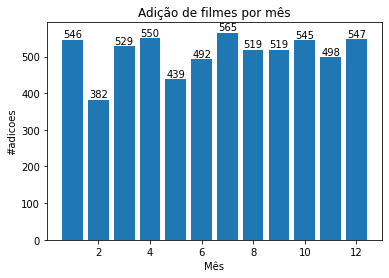

In [ ]:
#3- Mês no qual há mais adições de filmes na plataforma Netflix

net_filtro['date_added'] = pd.to_datetime(net_filtro['date_added'])
net_filtro['mes_add'] = net_filtro['date_added'].dt.month
net_filtro['year_add'] = net_filtro['date_added'].dt.year

mes_add = net_filtro[['mes_add']]

contagem_mes = mes_add['mes_add'].value_counts().to_dict()
mes_add['#adicoes'] = mes_add['mes_add'].map(contagem_mes)
mes_add = mes_add.drop_duplicates()
mes_add = mes_add.sort_values('mes_add', ascending=True)

display(mes_add.style.hide_index())

#plotando um gráfico de adições por mês
plt.bar(mes_add['mes_add'], mes_add['#adicoes'])
plt.title('Adição de filmes por mês')
plt.xlabel('Mês')
plt.ylabel('#adicoes')

# Adiciona rótulos as barras
for i, v in enumerate(mes_add['#adicoes']):
    plt.text(i + 1, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
#4- Quantidade de filmes listados como comédia. Netflix classifica comedias como "comedies" e o prime classifica como "comedy"
comed_list = total_movies_f[['listed_in', 'title']]
comed_list['listed_in'] = comed_list['listed_in'].str.lower()
comed_list = comed_list[comed_list['listed_in'].str.contains('comedies|comedy')]

comed_list.to_excel('teu.xlsx')

display(comed_list)

<ipython-input-12-1807f0ddf1f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comed_list['listed_in'] = comed_list['listed_in'].str.lower()


,listed_in,title
9,"comedies, dramas",The Starling
13,"children & family movies, comedies",Confessions of an Invisible Girl
22,"comedies, international movies",Avvai Shanmughi
24,"comedies, international movies, romantic movies",Jeans
26,"comedies, international movies, music & musicals",Minsara Kanavu
...,...,...
9649,comedy,Jack
9653,comedy,Date Night (Extended Cut)
9659,"comedy, drama, romance",10 Things I Hate About You
9660,comedy,The Man in the Hat


In [ ]:
#5- Lista de todos os gêneros de filmes.
list_genre = total_movies_f[['listed_in']]
list_genre = list_genre['listed_in'].str.split(',')
list_genre = list_genre.explode()
list_genre = list_genre.str.strip().str.lower()
list_genre = list_genre.to_frame(name='generos')
list_genre = list_genre.drop_duplicates().sort_values('generos', ascending=True)

#tratando lista de generos
replace_dict = {'animation': 'anime', 'and culture': 'culture', 'cult movies':'culture', 'anime features': 'anime', 'arthouse': 'arts', 'comedies': 'comedy', 'documentaries': 'documentary', 'dramas': 'drama', 'faith and spirituality': 'faith & spirituality', 'horror movies': 'horror', 'international movies': 'international', 'lgbtq movies': 'lgbtq', 'music videos and concerts': 'music & musicals', 'romantic movies': 'romance', 'sports movies': 'sports', 'science fiction': 'sci-fi & fantasy'}
list_genre['generos'] =  list_genre['generos'].replace(replace_dict)
list_genre = list_genre.drop_duplicates()
list_genre = list_genre[list_genre['generos'] != 'movies']


display(list_genre.style.hide_index())


<ipython-input-9-44d37ce478e7>:16: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(list_genre.style.hide_index())


generos
action
action & adventure
adventure
culture
anime
arts
children & family movies
classic movies
comedy
documentary


<ipython-input-17-fb7df51544fc>:20: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(freq_mov.style.hide_index())


year_month,#adicoes
200802,1
201303,1
201308,1
201309,1
201310,2
201402,1
201404,1
201411,2
201412,1
201502,1


<ipython-input-17-fb7df51544fc>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_1['year_month'] = netflix_1['year_month']
<ipython-input-17-fb7df51544fc>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_1['year_month'] = netflix_1['year_month'].astype(str)
<ipython-input-17-fb7df51544fc>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,plataforma,year_month,#adicoes
5957,netflix,200801,1
6611,netflix,200802,1
5956,netflix,200905,1
5955,netflix,200911,1
7370,netflix,201011,1
...,...,...,...
825,netflix,202105,132
618,netflix,202106,207
361,netflix,202107,257
183,netflix,202108,178


,plataforma,year_month,#adicoes
553,prime,202103,5
3573,prime,202104,10
4783,prime,202105,11
5587,prime,202106,25
6252,prime,202107,16
6984,prime,202108,24
8071,prime,202109,29
9162,prime,202110,19


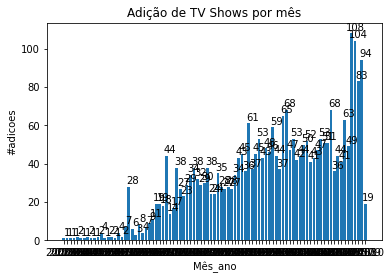

In [ ]:
#6- A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas
#Analise para todos os dados (Tratando a base)
freq_mov = total_movies[total_movies['type'] == 'TV Show']
freq_mov = freq_mov['date_added'].fillna('s/ data')
freq_mov = pd.DataFrame({'date_added': freq_mov})
freq_mov = freq_mov[freq_mov['date_added'] != 's/ data']
freq_mov['date_added'] = pd.to_datetime(freq_mov['date_added'])
freq_mov['year_month'] = freq_mov['date_added'].dt.strftime('%Y-%m')

#Montando a tabela com a frequencia de mensal(Temporal)
freq_mov_temp = freq_mov['year_month'].value_counts().to_dict()
freq_mov['#adicoes'] = freq_mov['year_month'].map(freq_mov_temp)
freq_mov = freq_mov[['year_month', '#adicoes']]
freq_mov = freq_mov.drop_duplicates()
freq_mov['year_month'] = freq_mov['year_month'].astype(str)
freq_mov['year_month'] = freq_mov['year_month'].str.replace('-','')

freq_mov = freq_mov.sort_values('year_month', ascending=True)

display(freq_mov.style.hide_index())

#Plotando um gráfico de adições por mês
plt.bar(freq_mov['year_month'], freq_mov['#adicoes'])
plt.title('Adição de TV Shows por mês')
plt.xlabel('Mês_ano')
plt.ylabel('#adicoes')

# Adiciona rótulos as barras
for i, v in enumerate(freq_mov['#adicoes']):
    plt.text(i + 1, v + 0.5, str(v), ha='center', va='bottom')

#plt.show()


#Vendo a frequencia de adição de TV Show do netflix
netflix_1 = netflix
netflix_1['plataforma'] = 'netflix' 
netflix_3 = netflix_1[netflix_1['type'] == 'TV Show']

netflix_1 = netflix_1[netflix_1['date_added'].notna()]
netflix_1 = netflix_1[['plataforma', 'date_added']]
netflix_1['date_added'] = pd.to_datetime(netflix_1['date_added'])
netflix_1['year_month'] = netflix_1['date_added'].dt.strftime('%Y-%m')

freq_mov_temp = netflix_1['year_month'].value_counts().to_dict()
netflix_1['#adicoes'] = netflix_1['year_month'].map(freq_mov_temp)
netflix_1 = netflix_1[['plataforma', 'year_month', '#adicoes']]

netflix_1['year_month'] = netflix_1['year_month']
netflix_1['year_month'] = netflix_1['year_month'].astype(str)
netflix_1['year_month'] = netflix_1['year_month'].str.replace('-','')
netflix_1 = netflix_1.drop_duplicates()
netflix_1 = netflix_1.sort_values('year_month', ascending=True)

display(netflix_1)

#Vendo a frequencia de adição de TV Show do prime
prime_1 = prime
prime_1['plataforma'] = 'prime' 
prime_1 = prime_1[prime_1['type'] == 'TV Show']

prime_1 = prime_1[prime_1['date_added'].notna()]
prime_1 = prime_1[['plataforma', 'date_added']]
prime_1['date_added'] = pd.to_datetime(prime_1['date_added'])
prime_1['year_month'] = prime_1['date_added'].dt.strftime('%Y-%m')

freq_mov_temp = prime_1['year_month'].value_counts().to_dict()
prime_1['#adicoes'] = prime_1['year_month'].map(freq_mov_temp)
prime_1 = prime_1[['plataforma', 'year_month', '#adicoes']]

prime_1['year_month'] = prime_1['year_month']
prime_1['year_month'] = prime_1['year_month'].astype(str)
prime_1['year_month'] = prime_1['year_month'].str.replace('-','')
prime_1 = prime_1.drop_duplicates()
prime_1 = prime_1.sort_values('year_month', ascending=True)

display(prime_1)


<ipython-input-30-b2fae26d4276>:19: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(freq_mov.style.hide_index())


year_month,#adicoes
200801,1
200905,1
200911,1
201011,1
201105,1
201109,1
201110,11
201202,1
201211,1
201212,1


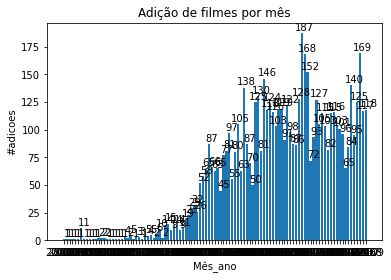

<ipython-input-30-b2fae26d4276>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_1['year_month'] = netflix_1['year_month']
<ipython-input-30-b2fae26d4276>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_1['year_month'] = netflix_1['year_month'].astype(str)
<ipython-input-30-b2fae26d4276>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,plataforma,year_month,#adicoes
5957,netflix,200801,1
5956,netflix,200905,1
5955,netflix,200911,1
7370,netflix,201011,1
5954,netflix,201105,1
...,...,...,...
826,netflix,202105,94
618,netflix,202106,124
362,netflix,202107,169
183,netflix,202108,117


,plataforma,year_month,#adicoes
0,prime,202103,9
9,prime,202104,5
14,prime,202105,1
15,prime,202106,1


In [30]:
#7- A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas
#Analise para todos os dados (Tratando a base)
freq_mov = total_movies_f['date_added'].fillna('s/ data')
freq_mov = pd.DataFrame({'date_added': freq_mov})
freq_mov = freq_mov[freq_mov['date_added'] != 's/ data']
freq_mov['date_added'] = pd.to_datetime(freq_mov['date_added'])
freq_mov['year_month'] = freq_mov['date_added'].dt.strftime('%Y-%m')

#Montando a tabela com a frequencia de mensal(Temporal)
freq_mov_temp = freq_mov['year_month'].value_counts().to_dict()
freq_mov['#adicoes'] = freq_mov['year_month'].map(freq_mov_temp)
freq_mov = freq_mov[['year_month', '#adicoes']]
freq_mov = freq_mov.drop_duplicates()
freq_mov['year_month'] = freq_mov['year_month'].astype(str)
freq_mov['year_month'] = freq_mov['year_month'].str.replace('-','')

freq_mov = freq_mov.sort_values('year_month', ascending=True)

display(freq_mov.style.hide_index())

#Plotando um gráfico de adições por mês
plt.bar(freq_mov['year_month'], freq_mov['#adicoes'])
plt.title('Adição de filmes por mês')
plt.xlabel('Mês_ano')
plt.ylabel('#adicoes')

# Adiciona rótulos as barras
for i, v in enumerate(freq_mov['#adicoes']):
    plt.text(i + 1, v + 0.5, str(v), ha='center', va='bottom')

plt.show()


#Vendo a frequencia de adição de filmes do netflix
netflix_1 = netflix
netflix_1['plataforma'] = 'netflix' 
netflix_1 = netflix_1[netflix_1['type'] == 'Movie']

netflix_1 = netflix_1[netflix_1['date_added'].notna()]
netflix_1 = netflix_1[['plataforma', 'date_added']]
netflix_1['date_added'] = pd.to_datetime(netflix_1['date_added'])
netflix_1['year_month'] = netflix_1['date_added'].dt.strftime('%Y-%m')

freq_mov_temp = netflix_1['year_month'].value_counts().to_dict()
netflix_1['#adicoes'] = netflix_1['year_month'].map(freq_mov_temp)
netflix_1 = netflix_1[['plataforma', 'year_month', '#adicoes']]

netflix_1['year_month'] = netflix_1['year_month']
netflix_1['year_month'] = netflix_1['year_month'].astype(str)
netflix_1['year_month'] = netflix_1['year_month'].str.replace('-','')
netflix_1 = netflix_1.drop_duplicates()
netflix_1 = netflix_1.sort_values('year_month', ascending=True)

display(netflix_1)

#Vendo a frequencia de adição de filmes do prime
prime_1 = prime
prime_1['plataforma'] = 'prime' 
prime_1 = prime_1[prime_1['type'] == 'Movie']

prime_1 = prime_1[prime_1['date_added'].notna()]
prime_1 = prime_1[['plataforma', 'date_added']]
prime_1['date_added'] = pd.to_datetime(prime_1['date_added'])
prime_1['year_month'] = prime_1['date_added'].dt.strftime('%Y-%m')

freq_mov_temp = prime_1['year_month'].value_counts().to_dict()
prime_1['#adicoes'] = prime_1['year_month'].map(freq_mov_temp)
prime_1 = prime_1[['plataforma', 'year_month', '#adicoes']]

prime_1['year_month'] = prime_1['year_month']
prime_1['year_month'] = prime_1['year_month'].astype(str)
prime_1['year_month'] = prime_1['year_month'].str.replace('-','')
prime_1 = prime_1.drop_duplicates()
prime_1 = prime_1.sort_values('year_month', ascending=True)

display(prime_1)
